# **Heart Disease Prediction Model**



[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### Step 1: Import the necessary libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

### Step 2: Load the dataset

In [3]:
df = pd.read_csv(r'/workspaces/Heart-Disease-Prediction-Model/data/heart.csv')

### Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [4]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)
row, col = df.shape

print('Number of Rows :', row)
print('Number of Columns :', col)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Shape of the data
(918, 12)
Number of Rows : 918
Number of Columns : 12


### Step 4: Statistical Insights

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df['Target'].value_counts()

1    508
0    410
Name: Target, dtype: int64

1 represents a Defective heart  **||**  0 represents a Healthy heart

### Step 5: Data Cleaning

Handling outliers, duplicates and missing values

##### Missing Values

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

##### Duplicate Values

In [10]:
df.duplicated().sum()

0

##### Outliers

Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

**Age**

<Axes: xlabel='Age'>

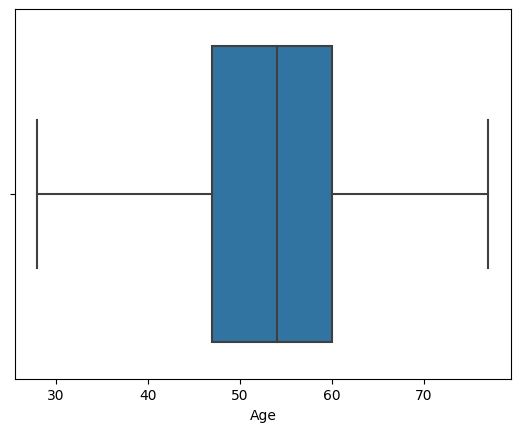

In [11]:
sns.boxplot(x = 'Age', data=df)

**Resting Blood Pressure**

<Axes: xlabel='RestingBP'>

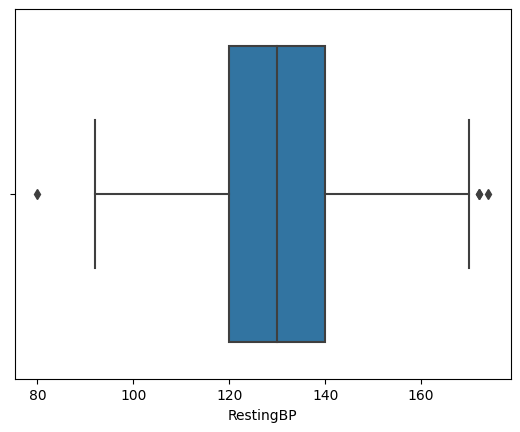

In [19]:
sns.boxplot(x = 'RestingBP', data=df)

The outliers above are problematic. To have a Resting Blood Pressure of below 100 and above 175 is practically impossible, hence we will be removing them.

In [13]:
df = df[df['RestingBP']>75]
df = df[df['RestingBP']<175]

In [14]:
df.shape

(894, 12)

**Cholesterol**

<Axes: xlabel='Cholesterol'>

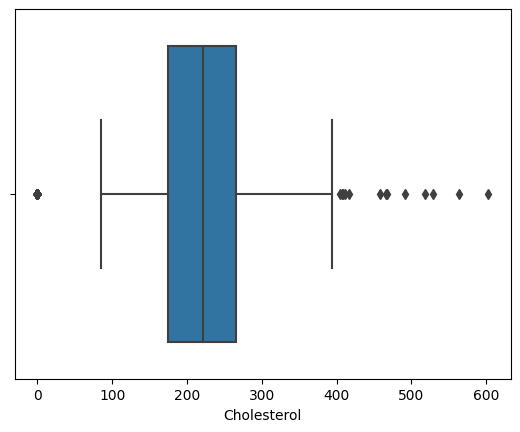

In [24]:
sns.boxplot(x = 'Cholesterol', data=df)

**Maximum Heart Rate**

<Axes: xlabel='MaxHR'>

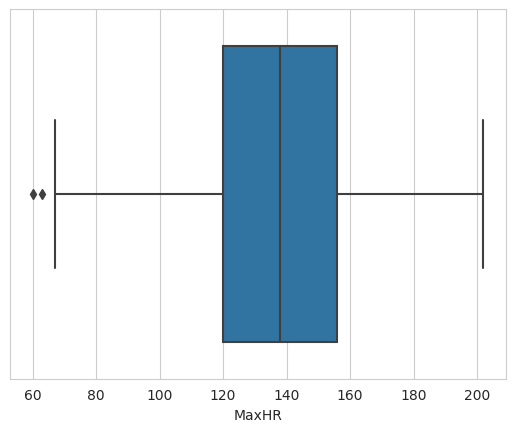

In [72]:
sns.boxplot(x = 'MaxHR', data=df)

### Step 6: Data Visualisation

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Age**

In [ ]:
sns.displot(df['Age'], bins=12)
plt.title('Age distribution')
plt.show()

From the above graph, we can deduce that most patients lie between the ages of 50 and 60 years.

**Sex**

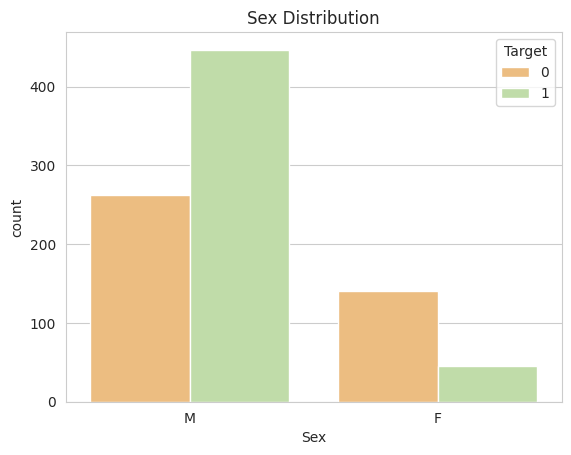

In [98]:
sns.countplot(x = 'Sex', data=df, palette='Spectral',hue='Target')
plt.title('Sex Distribution')
plt.show()

**Chest Pain Type**

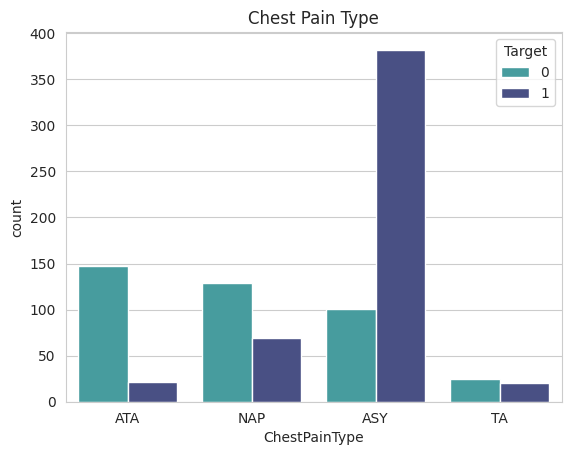

In [97]:
sns.countplot(x ='ChestPainType',hue='Target', data=df, palette='mako_r')
plt.title('Chest Pain Type')
plt.show()

**Resting Blood Pressure**

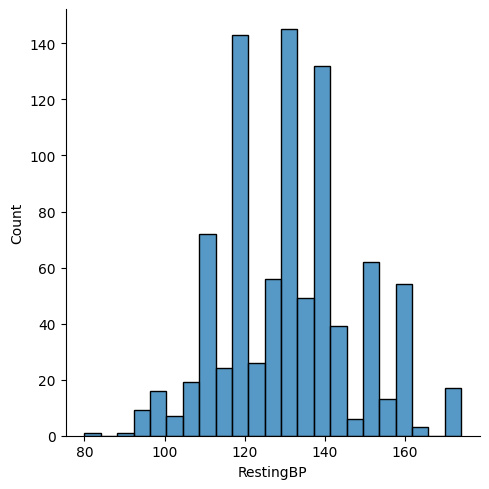

In [34]:
sns.displot(x = 'RestingBP', data=df)
plt.show()

**Cholesterol**

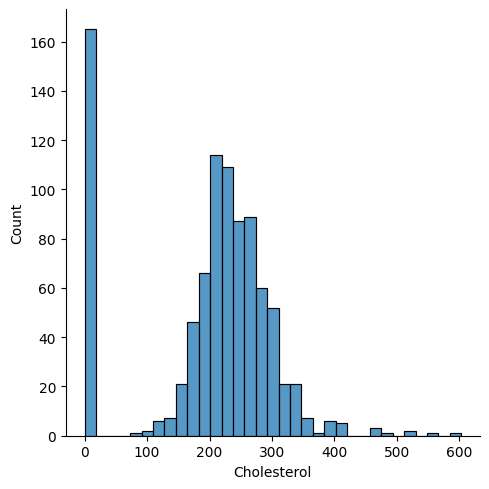

In [36]:
sns.displot(x = 'Cholesterol', data=df)
plt.show()

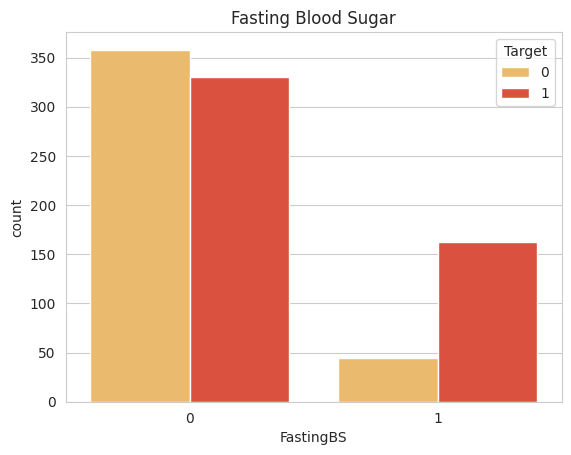

In [68]:
sns.countplot(x = 'FastingBS', hue='Target',data=df,palette='YlOrRd')
plt.title('Fasting Blood Sugar')
plt.show()

**Exercise Induced Angina**

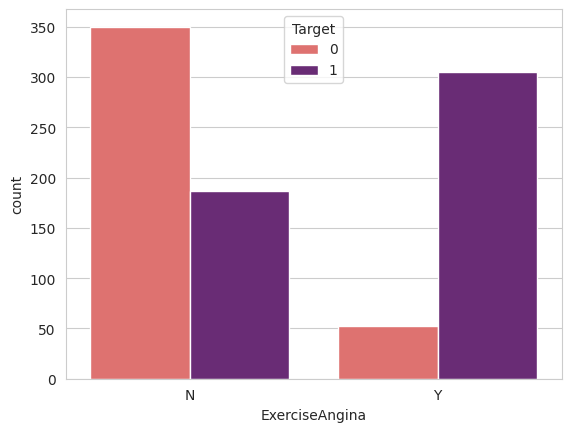

In [99]:
sns.countplot(x = 'ExerciseAngina', hue='Target',data=df,palette='magma_r')
plt.show()

**ST Slope**

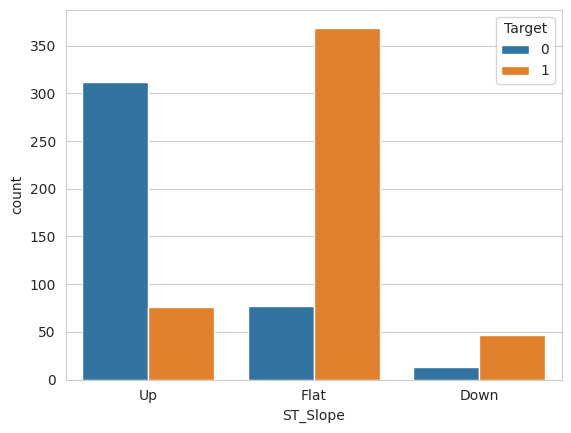

In [103]:
sns.countplot(x = 'ST_Slope', data=df, hue='Target')
plt.show()

**Target**

<Axes: xlabel='Target', ylabel='count'>

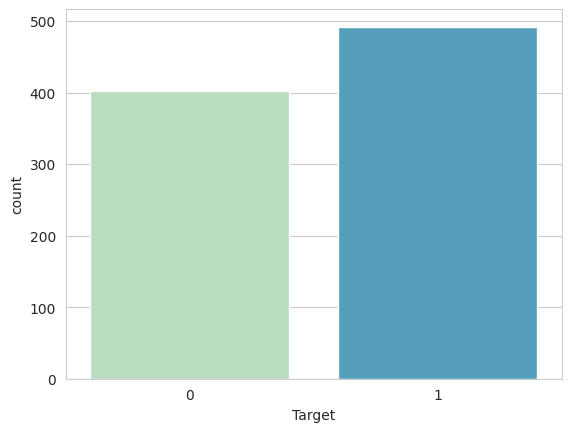

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=df,palette='GnBu')

### Step 8: Data Modelling

* Train-Test-Split 
* Fit the model to perform predictions
* Comparing the following algorithms to see which model performs the best

In [ ]:
X = df.drop(columns='Target',axis=1)
Y= df['Target'] 

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

In [ ]:
df= pd.get_dummies(df,columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn .preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale =['Age','MaxHR','Oldpeak']
df[columns_to_scale]= StandardScaler.fit_transform(df[columns_to_scale])

### Step 9: Model Evaluation

### Step 10: Testing the Model

- Take user input and predict the output